Import relevant libraries

In [3]:
import pandas as pd
import numpy as np
import itertools
from  sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

Load the csv 

In [4]:
news = pd.read_csv("news.csv")

In [5]:
news.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [6]:
labels=news.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

Make train and test models

In [7]:
x_train,x_test,y_train,y_test=train_test_split(news['text'],labels,test_size=0.2,random_state=7)

create a term frequency vector and fit and transform the train and test model

In [8]:
tfv=TfidfVectorizer(stop_words='english',max_df=0.7)
tfv_train=tfv.fit_transform(x_train)
tfv_test=tfv.transform(x_test)

initialize a PassiveAggressiveClassifier and  fit this on tfv_train and y_train

calculate accuracy 

In [9]:
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfv_train,y_train)
y_pr=pac.predict(tfv_test)
acc_score=accuracy_score(y_test,y_pr)
print(f'Accuracy: {round(acc_score*100,2)}%')

Accuracy: 92.74%


get the confusion matrix and plot it 

In [10]:
confusion_matrix(y_test,y_pr, labels=['FAKE','REAL'])

array([[589,  49],
       [ 43, 586]], dtype=int64)

In [11]:
#Function to plot the confusion matrix (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
from sklearn import metrics
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
    else:
            print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


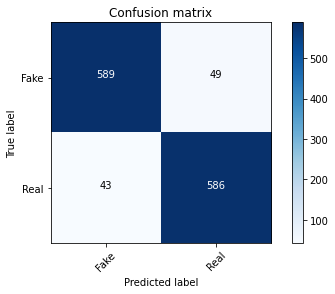

In [12]:
cm = metrics.confusion_matrix(y_test, y_pr)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

with this, we have 590 true positives, 588 true negatives, 41 false positives, and 48 false negatives.